<a href="https://colab.research.google.com/github/Nick-Azzarano/Machine-Learning-Practice/blob/main/Spring2025/In-Class_Problems/ML21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader

In [3]:
import matplotlib.pyplot as plt

In [4]:
x = np.linspace(-1,1,100)
x = x.reshape(-1,1)

In [5]:
y = np.abs(x)

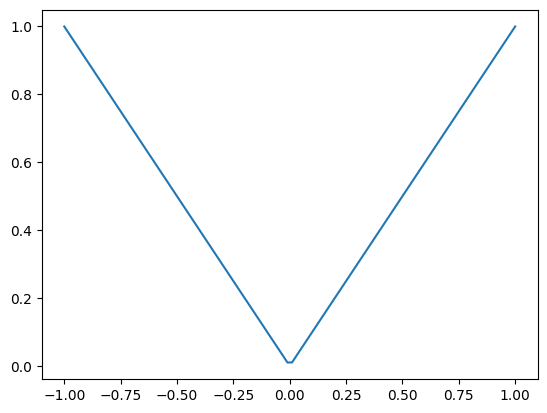

In [6]:
plt.plot(x,y)

In [7]:
class MyData(Dataset):
  def __init__(self, x, y):
    super().__init__()
    self.x = x
    self.y = y

  def __len__(self):
    return len(self.y)

  def __getitem__(self, index):
    return torch.tensor(self.x[index], dtype = torch.float), torch.tensor(self.y[index], dtype = torch.float)

In [8]:
data = MyData(x,y)

In [9]:
data[2]

(tensor([-0.9596]), tensor([0.9596]))

In [11]:
# The DataLoader is to help efficiently read in your massive dataset.
data_loader = DataLoader(data, batch_size=10)

In [12]:
for x_batch, y_batch in data_loader:
  print(x_batch.shape, y_batch.shape)
  break

torch.Size([10, 1]) torch.Size([10, 1])


In [13]:
import torch.nn as nn

In [ ]:
class MyModel(nn.Module):
  # The constructor is what layers are within your model
  def __init__(self, hidden_size):
    super().__init__()
    self.fc1 = nn.Linear(1, hidden_size) #fc stands for "fully connected", it fans out to hidden_size number of nodes
    self.activ = nn.Sigmoid()
    self.fc2 = nn.Linear(hidden_size, 1) # we map our hidden_size back down to 1.

  # An Activation Function allows you to approximate non-linear data.

  #
  def forward(self, x_batch):
    o = self.fc1(x_batch)
    o = self.activ(o)
    o = self.fc2(o)
    return o

In [ ]:
model = MyModel(5)

In [ ]:
#model.forward(torch.tensor(x, dtype = torch.float))

In [ ]:
from torch.nn import MSELoss
creterion = MSELoss()

In [ ]:
from torch.optim import Adam
optimizer = Adam(model.parameters(), lr=0.1)

In [ ]:
hist = []
for epoch in range(100):
  for x_b, y_b in data_loader:
    y_pred = model.forward(x_b)
    loss = creterion(y_pred, y_b)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    hist.append(loss.item())

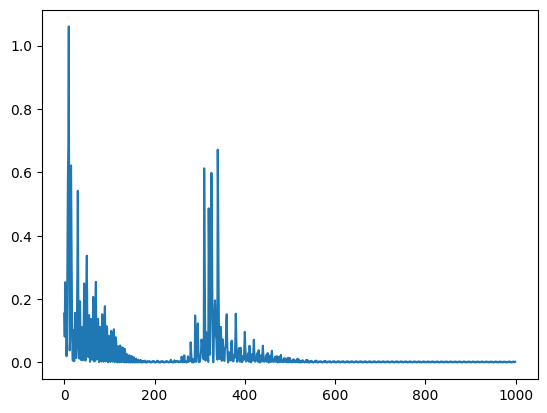

In [ ]:
plt.plot(hist)

In [ ]:
with torch.no_grad():
  y_pred = model.forward(torch.tensor(x, dtype=torch.float))

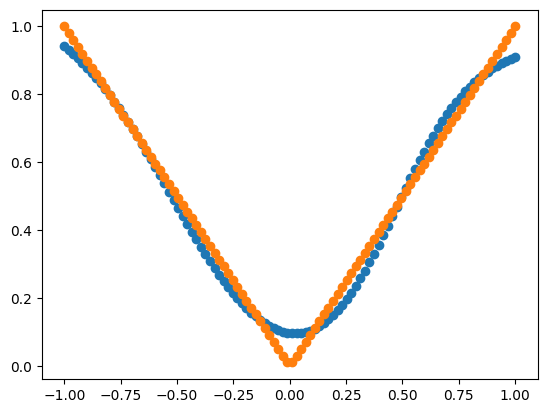

In [ ]:
plt.scatter(x, y_pred)
plt.scatter(x, y)